# 1. Importing libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# 2. Importing data


In [2]:
# turn a project folder path into a string

path = r'/Users/mart/Documents/06-2022 Instacart Basket Analysis'

In [3]:
# import the "orders_products_merged.pkl"

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge.pkl'))

In [4]:
ords_prods_merge.head()

product_id                product_name  aisle_id  department_id  prices  \
0           1  Chocolate Sandwich Cookies        61             19     5.8   
1           1  Chocolate Sandwich Cookies        61             19     5.8   
2           1  Chocolate Sandwich Cookies        61             19     5.8   
3           1  Chocolate Sandwich Cookies        61             19     5.8   
4           1  Chocolate Sandwich Cookies        61             19     5.8   

   order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   3139998      138            28                   6                 11   
1   1977647      138            30                   6                 17   
2    389851      709             2                   0                 21   
3    652770      764             1                   3                 13   
4   1813452      764             3                   4                 17   

   days_since_prior_order  first_time_order  add_to_cart_order  reordered  \
0                     3.0             False                  5          0   
1                    20.0             False                  1          1   
2                     6.0             False                 20          0   
3                     NaN              True                 10          0   
4                     9.0             False                 11          1   

   max_order      loyalty_flag  average_price spending_flag  \
0         32  Regular customer       6.935811   Low spender   
1         32  Regular customer       6.935811   Low spender   
2          5      New customer       7.930208   Low spender   
3          3      New customer       4.972414   Low spender   
4          3      New customer       4.972414   Low spender   

   median_days_since_prior_order order_frequency_flag  
0                            8.0    Frequent customer  
1                            8.0    Frequent customer  
2                            8.0    Frequent customer  
3                            9.0    Frequent customer  
4                            9.0    Frequent customer

In [5]:
ords_prods_merge.shape

(32404859, 20)

# 3. Bar Charts

<AxesSubplot:>

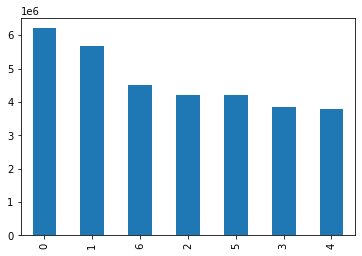

In [6]:
# create a bar chart for the column “orders_day_week” 

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

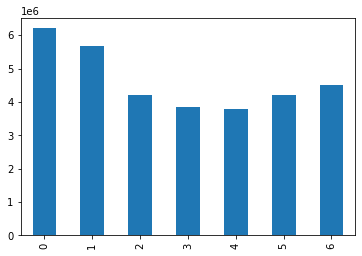

In [7]:
# sort the bars in the chart according to their index order (rather than largest to smallest)

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

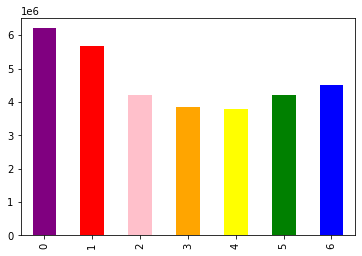

In [8]:
# adding a color argument in the plot.bar()

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

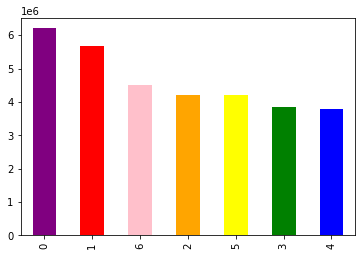

In [9]:
# save bar chart within the bar object

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
# export a bar chart outside of Jupyter in the form of an image file

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 4. Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

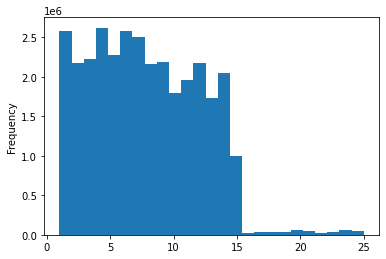

In [11]:
# create a histogram of the “prices” column

ords_prods_merge['prices'].plot.hist(bins = 25)

In [12]:
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [13]:
ords_prods_merge['prices'].mean()

7.790994092392491

In [14]:
ords_prods_merge['prices'].median()

7.4

In [15]:
ords_prods_merge['prices'].max()

25.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

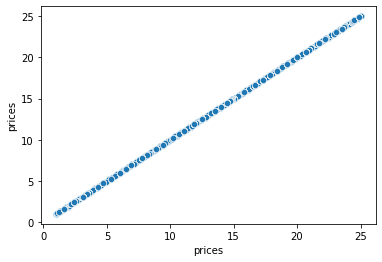

In [16]:
# create a scaterplot of the “prices” column

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

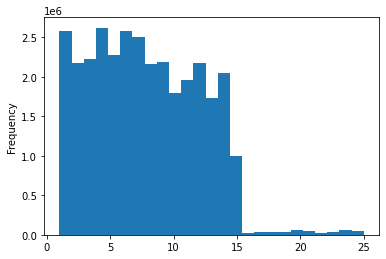

In [17]:
# create a histogram for 'prices' column after data cleaning

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

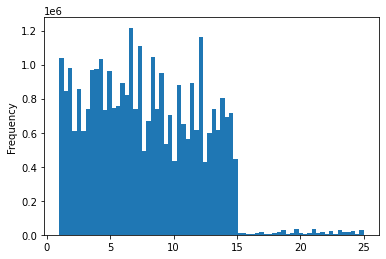

In [18]:
# create a histogram for 'prices' column with increased number of bins

hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [19]:
# export histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# 5. Sampling Data

In [20]:
# set the seed for the random number generator

np.random.seed(4)

In [21]:
# create a List holding True/False values to the test np.random.rand() <= 0.7


dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [22]:
# store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [23]:
# store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [24]:
# check if we get the same numbers of rows as ords_prods_merge has

len(ords_prods_merge)

32404859

In [25]:
len(big)+len(small)

32404859

In [26]:
# reduce the samples to 'orders_day_of_the_week' and 'prices'

df_2 = small[['orders_day_of_week','prices']]

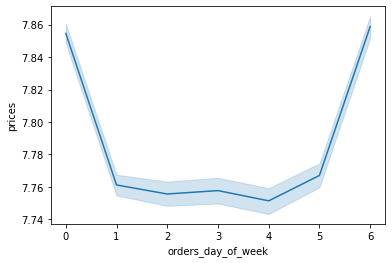

In [27]:
# create a line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [28]:
# export a line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ords_dow_prices.png'))